<a href="https://colab.research.google.com/github/Sarah4045/Deep_Learning/blob/main/DNN_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

In [ ]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65648,2019,2,MQ,Envoy Air,BPT,"Beaumont/Port Arthur, TX: Jack Brooks Regional",72.0,15.0,3.79,0.84,...,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0
65649,2019,2,MQ,Envoy Air,BTR,"Baton Rouge, LA: Baton Rouge Metropolitan/Ryan...",13.0,5.0,0.00,0.26,...,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0
65650,2019,2,MQ,Envoy Air,BUF,"Buffalo, NY: Buffalo Niagara International",93.0,24.0,5.41,1.11,...,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0
65651,2019,2,MQ,Envoy Air,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",91.0,17.0,3.14,0.77,...,0.0,6.05,8.0,0.0,1070.0,208.0,103.0,382.0,0.0,377.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65653 entries, 0 to 65652
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 65653 non-null  int64  
 1   month                65653 non-null  int64  
 2   carrier              65653 non-null  object 
 3   carrier_name         65653 non-null  object 
 4   airport              65650 non-null  object 
 5   airport_name         65653 non-null  object 
 6   arr_flights          65527 non-null  float64
 7   arr_del15            65344 non-null  float64
 8   carrier_ct           65527 non-null  float64
 9   weather_ct           65525 non-null  float64
 10  nas_ct               65527 non-null  float64
 11  security_ct          65527 non-null  float64
 12  late_aircraft_ct     65527 non-null  float64
 13  arr_cancelled        65526 non-null  float64
 14  arr_diverted         65524 non-null  float64
 15  arr_delay            65524 non-null 

In [ ]:
data = data.drop(['carrier','carrier_name','airport','airport_name'],axis=1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65648,2019,2,72.0,15.0,3.79,0.84,6.58,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0
65649,2019,2,13.0,5.0,0.00,0.26,1.73,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0
65650,2019,2,93.0,24.0,5.41,1.11,4.78,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0
65651,2019,2,91.0,17.0,3.14,0.77,7.04,0.0,6.05,8.0,0.0,1070.0,208.0,103.0,382.0,0.0,377.0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65337 entries, 0 to 65651
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 65337 non-null  int64  
 1   month                65337 non-null  int64  
 2   arr_flights          65337 non-null  float64
 3   arr_del15            65337 non-null  float64
 4   carrier_ct           65337 non-null  float64
 5   weather_ct           65337 non-null  float64
 6   nas_ct               65337 non-null  float64
 7   security_ct          65337 non-null  float64
 8   late_aircraft_ct     65337 non-null  float64
 9   arr_cancelled        65337 non-null  float64
 10  arr_diverted         65337 non-null  float64
 11  arr_delay            65337 non-null  float64
 12  carrier_delay        65337 non-null  float64
 13  weather_delay        65337 non-null  float64
 14  nas_delay            65337 non-null  float64
 15  security_delay       65337 non-null 

In [ ]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 27876.0)

In [ ]:
data['WDCase'] = data['weather_delay'].apply(lambda x : 1 if x >100 else 0)

In [ ]:
data['WDCase'].value_counts()

0    47809
1    17528
Name: WDCase, dtype: int64

In [ ]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65647,2019,2,56.0,9.0,2.97,0.00,2.03,0.0,4.00,7.0,0.0,573.0,128.0,0.0,124.0,0.0,321.0,0
65648,2019,2,72.0,15.0,3.79,0.84,6.58,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0,0
65649,2019,2,13.0,5.0,0.00,0.26,1.73,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0,0
65650,2019,2,93.0,24.0,5.41,1.11,4.78,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0,1


In [ ]:
X = data.drop(['WDCase'],axis = 1)
y =data['WDCase']


In [ ]:

X


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65647,2019,2,56.0,9.0,2.97,0.00,2.03,0.0,4.00,7.0,0.0,573.0,128.0,0.0,124.0,0.0,321.0
65648,2019,2,72.0,15.0,3.79,0.84,6.58,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0
65649,2019,2,13.0,5.0,0.00,0.26,1.73,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0
65650,2019,2,93.0,24.0,5.41,1.11,4.78,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
65647    0
65648    0
65649    0
65650    1
65651    1
Name: WDCase, Length: 65337, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (49002, 17)
X_test shape is  (16335, 17)
y_train shape is  (49002,)
y_test shape is  (16335,)


In [ ]:
import tensorflow as tf
import keras

In [ ]:
KerasModel = keras.models.Sequential([
                # keras.layers.Input(shape=(17)),
            keras.layers.Dense(8,  activation = 'tanh'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(128, activation = 'sigmoid'),
            # keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation = 'tanh'),
            keras.layers.Dense(32, activation = 'tanh'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'sigmoid')
            ])

In [ ]:
2,4,8,16,32,64,128,256,512

(2, 4, 8, 16, 32, 64, 128, 256, 512)

In [ ]:
MyOptimizer = tf.keras.optimizers.experimental.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW")

In [ ]:
KerasModel.compile(optimizer =MyOptimizer,loss='binary_crossentropy',metrics=['accuracy']) # matrix

In [ ]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])


Epoch 1/100
5/5 [==============================] - 2s 126ms/step - loss: 0.5984 - accuracy: 0.7259 - val_loss: 0.5733 - val_accuracy: 0.7287
Epoch 2/100
5/5 [==============================] - 0s 51ms/step - loss: 0.5640 - accuracy: 0.7338 - val_loss: 0.5463 - val_accuracy: 0.7287
Epoch 3/100
5/5 [==============================] - 0s 50ms/step - loss: 0.5380 - accuracy: 0.7347 - val_loss: 0.5188 - val_accuracy: 0.7287
Epoch 4/100
5/5 [==============================] - 0s 59ms/step - loss: 0.5047 - accuracy: 0.7410 - val_loss: 0.4830 - val_accuracy: 0.8028
Epoch 5/100
5/5 [==============================] - 0s 49ms/step - loss: 0.4687 - accuracy: 0.7757 - val_loss: 0.4488 - val_accuracy: 0.8038
Epoch 6/100
5/5 [==============================] - 0s 45ms/step - loss: 0.4348 - accuracy: 0.8065 - val_loss: 0.4175 - val_accuracy: 0.8087
Epoch 7/100
5/5 [==============================] - 0s 56ms/step - loss: 0.4086 - accuracy: 0.8130 - val_loss: 0.3977 - val_accuracy: 0.8096
Epoch 8/100
5/5 [==

In [ ]:
print(KerasModel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 144       
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11665 (45.57 KB)
Trainable params: 11665 (

In [ ]:
KerasModel.save('KerasModel.model')

In [ ]:
NewKerasModel = keras.models.load_model('KerasModel.model')


In [ ]:
X_test


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
48234,2019,12,55.0,9.0,4.08,0.00,1.79,0.00,3.13,0.0,1.0,1294.0,1000.0,0.0,120.0,0.0,174.0
51716,2019,10,29.0,5.0,2.16,0.00,2.56,0.00,0.28,0.0,0.0,164.0,71.0,0.0,88.0,0.0,5.0
55367,2019,8,1019.0,255.0,47.63,5.79,104.39,3.42,93.77,30.0,0.0,21685.0,3933.0,489.0,7893.0,181.0,9189.0
11442,2021,11,593.0,115.0,64.00,24.00,2.00,0.00,25.00,4.0,1.0,9439.0,6615.0,1054.0,97.0,0.0,1673.0
18651,2021,7,195.0,71.0,27.36,4.60,12.20,0.00,26.84,6.0,1.0,7554.0,1907.0,1214.0,614.0,0.0,3819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60972,2019,5,108.0,38.0,14.24,0.00,9.27,0.00,14.49,3.0,0.0,2800.0,937.0,0.0,539.0,0.0,1324.0
31017,2020,11,30.0,3.0,2.00,1.00,0.00,0.00,0.00,0.0,0.0,76.0,30.0,46.0,0.0,0.0,0.0
18470,2021,7,192.0,73.0,23.79,5.55,12.54,0.00,31.12,1.0,0.0,4520.0,1171.0,398.0,460.0,0.0,2491.0
43521,2020,3,92.0,6.0,0.09,0.00,3.07,0.00,2.85,26.0,0.0,373.0,12.0,0.0,79.0,0.0,282.0


In [ ]:
y_pred = NewKerasModel.predict(X_test)

511/511 [==============================] - 1s 2ms/step


In [ ]:
print('Prediction Shape is {}'.format(y_pred.shape))


Prediction Shape is (16335, 1)


In [ ]:
print('Prediction items are {}'.format(y_pred[:5]))


Prediction items are [[2.4291317e-03]
 [5.9757283e-04]
 [9.9686718e-01]
 [9.9710941e-01]
 [9.9686718e-01]]


In [ ]:
y_test[:5]

48234    0
51716    0
55367    1
11442    1
18651    1
Name: WDCase, dtype: int64

In [ ]:

ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))


511/511 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9948
Model Loss is 0.02445557899773121
Model Accuracy is 0.9947964549064636


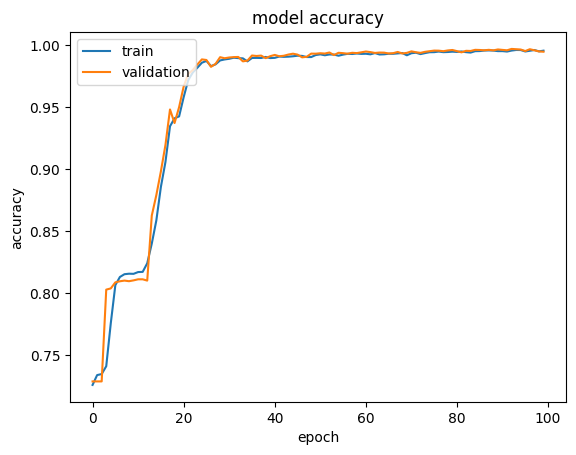

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


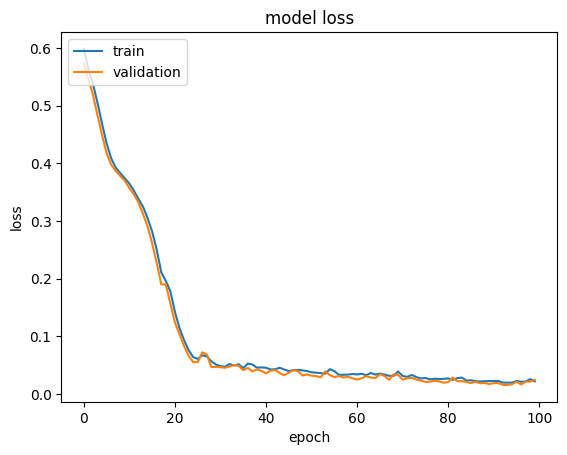

In [ ]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:

len(y_test), len(y_pred)


(16335, 16335)

In [ ]:

y_pred


array([[2.4291317e-03],
       [5.9757283e-04],
       [9.9686718e-01],
       ...,
       [9.8809981e-01],
       [1.1650355e-03],
       [9.5379329e-01]], dtype=float32)

In [ ]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[11820    84]
 [    1  4430]]


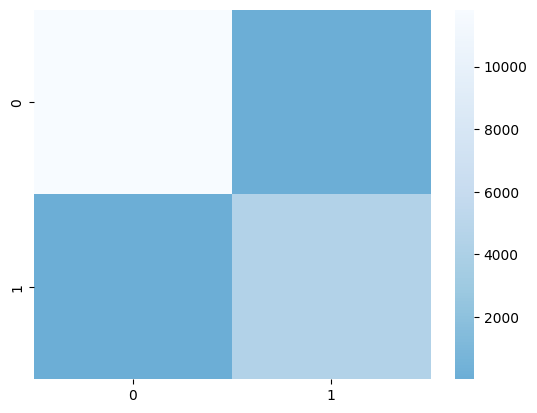

In [ ]:

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     11904
           1       0.98      1.00      0.99      4431

    accuracy                           0.99     16335
   macro avg       0.99      1.00      0.99     16335
weighted avg       0.99      0.99      0.99     16335



In [ ]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 27876.0)

In [ ]:
data.shape

(65337, 18)

In [ ]:
def Value(x) :
  if x <=30 :
    return 0
  elif x <= 100 :
    return 1
  elif x <= 200 :
    return 2
  else :
    return 3
data['WDCase'] = data['weather_delay'].apply(lambda x : Value(x))

data['WDCase'].value_counts()


0    38685
3    11717
1     9124
2     5811
Name: WDCase, dtype: int64

In [ ]:
X = data.drop(['WDCase'],axis = 1)
y =data['WDCase']


In [ ]:

X


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65647,2019,2,56.0,9.0,2.97,0.00,2.03,0.0,4.00,7.0,0.0,573.0,128.0,0.0,124.0,0.0,321.0
65648,2019,2,72.0,15.0,3.79,0.84,6.58,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0
65649,2019,2,13.0,5.0,0.00,0.26,1.73,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0
65650,2019,2,93.0,24.0,5.41,1.11,4.78,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0


In [ ]:

y


0        0
1        0
2        0
3        1
4        0
        ..
65647    0
65648    0
65649    0
65650    2
65651    2
Name: WDCase, Length: 65337, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (49002, 17)
X_test shape is  (16335, 17)
y_train shape is  (49002,)
y_test shape is  (16335,)


In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation = 'softmax'),
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100


ValueError: ignored

In [ ]:
y_train

7900     0
15979    0
47060    0
58401    0
1324     3
        ..
50026    2
25812    0
60452    3
3499     1
14121    0
Name: WDCase, Length: 49002, dtype: int64

In [ ]:
y_cat = tf.keras.utils.to_categorical(y)
y[:20]

0     0
1     0
2     0
3     1
4     0
5     1
6     3
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
18    0
19    1
20    0
21    0
Name: WDCase, dtype: int64

In [ ]:

y_cat[:20]


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (49002, 17)
X_test shape is  (16335, 17)
y_train shape is  (49002, 4)
y_test shape is  (16335, 4)


In [ ]:
y_train


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:

KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation = 'softmax'),
        ])

KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])



Epoch 1/100
5/5 [==============================] - 2s 185ms/step - loss: 1.1278 - accuracy: 0.5990 - val_loss: 1.0136 - val_accuracy: 0.6629
Epoch 2/100
5/5 [==============================] - 0s 95ms/step - loss: 1.0080 - accuracy: 0.6678 - val_loss: 0.9711 - val_accuracy: 0.6660
Epoch 3/100
5/5 [==============================] - 0s 96ms/step - loss: 0.9680 - accuracy: 0.6718 - val_loss: 0.9476 - val_accuracy: 0.6695
Epoch 4/100
5/5 [==============================] - 0s 73ms/step - loss: 0.9468 - accuracy: 0.6734 - val_loss: 0.9339 - val_accuracy: 0.6687
Epoch 5/100
5/5 [==============================] - 0s 45ms/step - loss: 0.9382 - accuracy: 0.6767 - val_loss: 0.9310 - val_accuracy: 0.6737
Epoch 6/100
5/5 [==============================] - 0s 57ms/step - loss: 0.9308 - accuracy: 0.6801 - val_loss: 0.9277 - val_accuracy: 0.6767
Epoch 7/100
5/5 [==============================] - 0s 64ms/step - loss: 0.9276 - accuracy: 0.6821 - val_loss: 0.9266 - val_accuracy: 0.6773
Epoch 8/100
5/5 [==

In [ ]:
print(KerasModel.summary())



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 144       
                                                                 
 dense_10 (Dense)            (None, 128)               1152      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 4)                 260       
                                                                 
Total params: 9812 (38.33 KB)
Trainable params: 9812 (38.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
KerasModel.save('KerasModel.model')



In [ ]:
NewKerasModel = keras.models.load_model('KerasModel.model')



In [ ]:
y_pred = NewKerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

y_pred[:10]



511/511 [==============================] - 1s 2ms/step
Prediction Shape is (16335, 4)
Prediction items are [[9.90337372e-01 9.36316792e-03 2.91412667e-04 8.00234284e-06]
 [9.98928487e-01 1.03612314e-03 3.40103979e-05 1.36580422e-06]
 [1.64817175e-05 2.31251903e-02 9.18100700e-02 8.85048211e-01]
 [1.13095666e-04 1.13756709e-01 1.73900366e-01 7.12229848e-01]
 [1.64817175e-05 2.31251903e-02 9.18100700e-02 8.85048211e-01]]


array([[9.90337372e-01, 9.36316792e-03, 2.91412667e-04, 8.00234284e-06],
       [9.98928487e-01, 1.03612314e-03, 3.40103979e-05, 1.36580422e-06],
       [1.64817175e-05, 2.31251903e-02, 9.18100700e-02, 8.85048211e-01],
       [1.13095666e-04, 1.13756709e-01, 1.73900366e-01, 7.12229848e-01],
       [1.64817175e-05, 2.31251903e-02, 9.18100700e-02, 8.85048211e-01],
       [9.98928487e-01, 1.03612314e-03, 3.40103979e-05, 1.36580422e-06],
       [9.98928487e-01, 1.03612314e-03, 3.40103979e-05, 1.36580422e-06],
       [9.90337372e-01, 9.36316792e-03, 2.91412667e-04, 8.00234284e-06],
       [9.21466589e-01, 7.60044828e-02, 2.34610867e-03, 1.82738397e-04],
       [1.64817175e-05, 2.31251903e-02, 9.18100700e-02, 8.85048211e-01]],
      dtype=float32)

In [ ]:

ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

print(history.history.keys())

511/511 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.8527
Model Loss is 0.3371509313583374
Model Accuracy is 0.8527089357376099
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


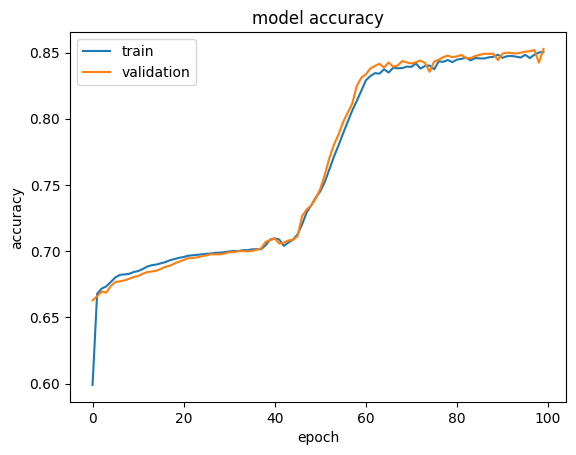

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


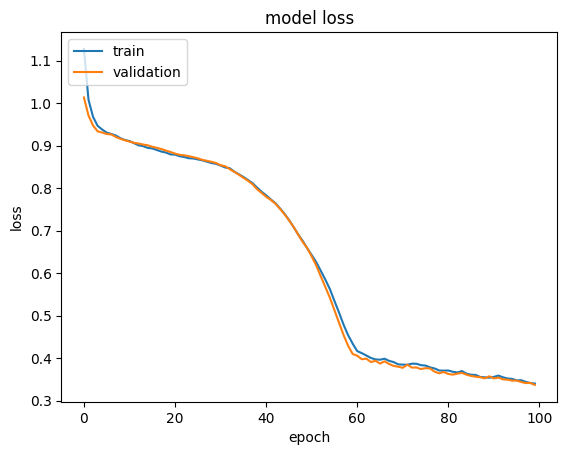

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:


len(y_test), len(y_pred)

(16335, 16335)

In [ ]:

y_pred


array([[9.9033737e-01, 9.3631679e-03, 2.9141267e-04, 8.0023428e-06],
       [9.9892849e-01, 1.0361231e-03, 3.4010398e-05, 1.3658042e-06],
       [1.6481717e-05, 2.3125190e-02, 9.1810070e-02, 8.8504821e-01],
       ...,
       [1.6481734e-05, 2.3125201e-02, 9.1810115e-02, 8.8504821e-01],
       [9.9033749e-01, 9.3631735e-03, 2.9141273e-04, 8.0023365e-06],
       [1.8902386e-02, 6.6573578e-01, 2.5068495e-01, 6.4676836e-02]],
      dtype=float32)

In [ ]:

y_test



array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:

new_y_pred = [np.argmax(i) for i in y_pred]
new_y_test = [np.argmax(i) for i in y_test]
print(new_y_pred[:30])
print(new_y_test[:30])



[0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 3, 0, 3, 0, 3, 0, 1, 3, 0]
[0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 3, 0, 1, 0, 3, 0, 1, 3, 0]


Confusion Matrix is : 
 [[9612   30    0    6]
 [ 151 1452    1  652]
 [   3  588    0  871]
 [   0  104    0 2865]]


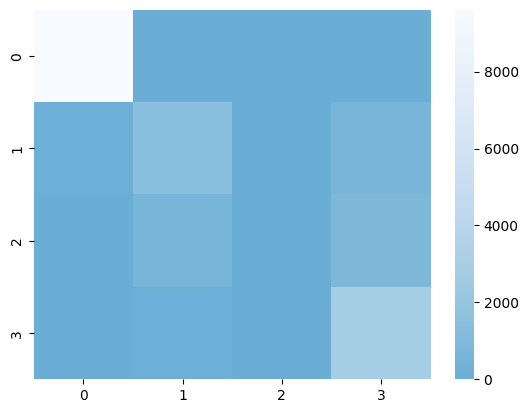

Classification Report is : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9648
           1       0.67      0.64      0.66      2256
           2       0.00      0.00      0.00      1462
           3       0.65      0.96      0.78      2969

    accuracy                           0.85     16335
   macro avg       0.58      0.65      0.61     16335
weighted avg       0.79      0.85      0.82     16335



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(new_y_test, new_y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

from sklearn.metrics import classification_report
ClassificationReport = classification_report(new_y_test,new_y_pred)
print('Classification Report is : \n', ClassificationReport )


In [ ]:
data


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65647,2019,2,56.0,9.0,2.97,0.00,2.03,0.0,4.00,7.0,0.0,573.0,128.0,0.0,124.0,0.0,321.0,0
65648,2019,2,72.0,15.0,3.79,0.84,6.58,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0,0
65649,2019,2,13.0,5.0,0.00,0.26,1.73,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0,0
65650,2019,2,93.0,24.0,5.41,1.11,4.78,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0,2


In [ ]:
X = data.drop(['arr_flights'],axis = 1)
y =data['arr_flights']


In [ ]:

X


,year,month,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65647,2019,2,9.0,2.97,0.00,2.03,0.0,4.00,7.0,0.0,573.0,128.0,0.0,124.0,0.0,321.0,0
65648,2019,2,15.0,3.79,0.84,6.58,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0,0
65649,2019,2,5.0,0.00,0.26,1.73,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0,0
65650,2019,2,24.0,5.41,1.11,4.78,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0,2


In [ ]:

y


0        136.0
1         91.0
2         19.0
3         88.0
4        181.0
         ...  
65647     56.0
65648     72.0
65649     13.0
65650     93.0
65651     91.0
Name: arr_flights, Length: 65337, dtype: float64

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (49002, 17)
X_test shape is  (16335, 17)
y_train shape is  (49002,)
y_test shape is  (16335,)


In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'linear'),
        ])



In [ ]:
KerasModel.compile(optimizer ='adam',loss='mse',metrics=['mse'])


In [ ]:

history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_loss',
                                            restore_best_weights=True)])

Epoch 1/100
5/5 [==============================] - 2s 150ms/step - loss: 851654.3750 - mse: 851654.3750 - val_loss: 839732.5625 - val_mse: 839732.5625
Epoch 2/100
5/5 [==============================] - 0s 75ms/step - loss: 850541.3750 - mse: 850541.3750 - val_loss: 838644.6875 - val_mse: 838644.6875
Epoch 3/100
5/5 [==============================] - 0s 81ms/step - loss: 849431.4375 - mse: 849431.4375 - val_loss: 837575.5625 - val_mse: 837575.5625
Epoch 4/100
5/5 [==============================] - 0s 75ms/step - loss: 848358.0000 - mse: 848358.0000 - val_loss: 836566.8125 - val_mse: 836566.8125
Epoch 5/100
5/5 [==============================] - 1s 146ms/step - loss: 847368.8125 - mse: 847368.8125 - val_loss: 835679.6875 - val_mse: 835679.6875
Epoch 6/100
5/5 [==============================] - 1s 116ms/step - loss: 846536.6875 - mse: 846536.6875 - val_loss: 834957.8750 - val_mse: 834957.8750
Epoch 7/100
5/5 [==============================] - 0s 42ms/step - loss: 845856.0000 - mse: 845856

In [ ]:

print(KerasModel.summary())



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 144       
                                                                 
 dense_14 (Dense)            (None, 128)               1152      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9617 (37.57 KB)
Trainable params: 9617 (37.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))


511/511 [==============================] - 1s 2ms/step
Prediction Shape is (16335, 1)
Prediction items are [[42.762604]
 [42.762604]
 [42.76247 ]
 [42.762604]
 [42.76247 ]]


In [ ]:

y_pred[:10]


array([[42.762604],
       [42.762604],
       [42.76247 ],
       [42.762604],
       [42.76247 ],
       [42.762604],
       [42.762604],
       [42.762604],
       [42.76247 ],
       [42.76247 ]], dtype=float32)

In [ ]:
y_test[:10]

48234      55.0
51716      29.0
55367    1019.0
11442     593.0
18651     195.0
39771      28.0
23488      60.0
55757      68.0
43490     835.0
46896     604.0
Name: arr_flights, dtype: float64

In [ ]:

ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))



511/511 [==============================] - 1s 3ms/step - loss: 816610.3750 - mse: 816610.3750
Model Loss is 816610.375
Model Accuracy is 816610.375


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


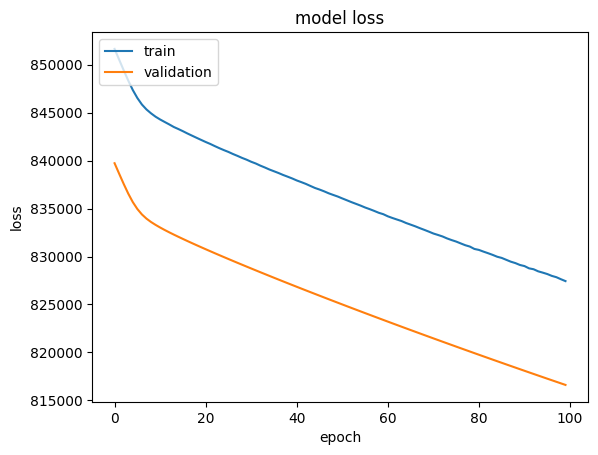

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:

from sklearn.metrics import mean_absolute_error ,mean_squared_error , median_absolute_error,r2_score

print('Mean Absolute Error Value is : ', mean_absolute_error(y_test, y_pred) )
print('Mean Squared Error Value is : ', mean_squared_error(y_test, y_pred))
print('Median Absolute Error Value is : ', median_absolute_error(y_test, y_pred))
print('R2 Squared Value is : ', r2_score(y_test, y_pred))





Mean Absolute Error Value is :  270.06617811688744
Mean Squared Error Value is :  816610.0549979717
Median Absolute Error Value is :  43.237396240234375
R2 Squared Value is :  -0.0890723780186009
